In [12]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**Importing the dataset**

In [14]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
df.shape

(400, 5)

In [16]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


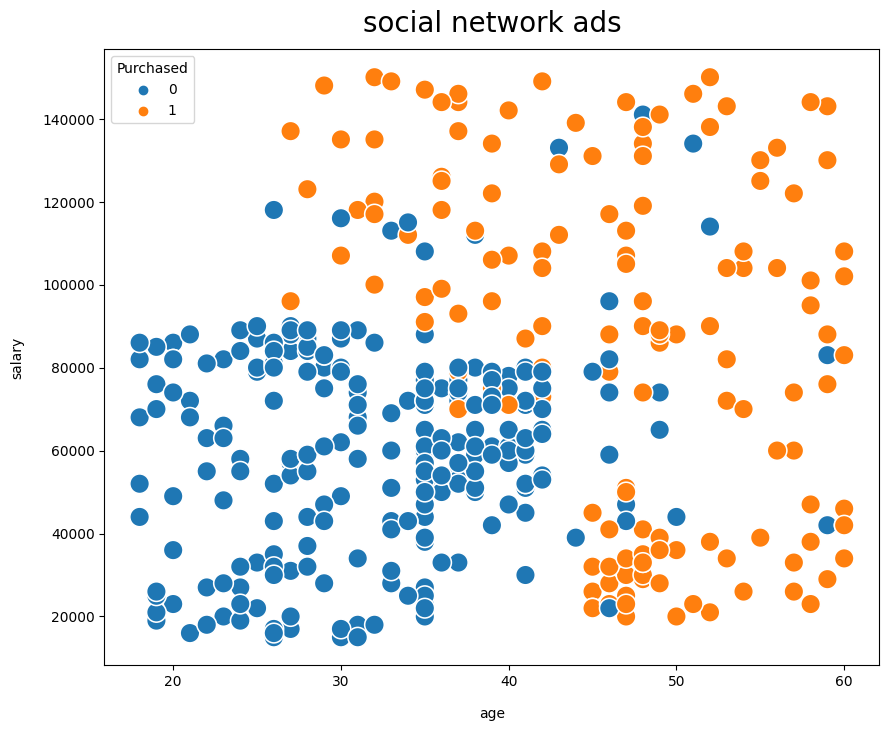

In [18]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, s=200)
plt.title("social network ads", y=1.015, fontsize=20)
plt.xlabel("age", labelpad=13)
plt.ylabel("salary", labelpad=13)
ax = plt.gca()

1) High age and high salary = > purchased
2) there is a linear decision boundary so good to go with LR model

In [19]:
df = df.drop(columns='User ID')
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [21]:
df['Gender']=df['Gender'].map({'Male':1,"Female":0})
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [22]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

**Feature Scaling**

In [23]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() 
scaler.fit(x_train) # find the values of mu and sigma
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test) #only transform the test dataset, dont fit it

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [25]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(x_train,y_train) #best values of betas - training/learning happens here
y_pred=logistic_regression.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

**Step 3 | Predection**

In [27]:
logistic_regression.predict_proba(x_test)

array([[0.87943714, 0.12056286],
       [0.84745824, 0.15254176],
       [0.79219438, 0.20780562],
       [0.91949173, 0.08050827],
       [0.91193404, 0.08806596],
       [0.99168292, 0.00831708],
       [0.98663923, 0.01336077],
       [0.24871574, 0.75128426],
       [0.99494675, 0.00505325],
       [0.47116463, 0.52883537],
       [0.96152811, 0.03847189],
       [0.97412746, 0.02587254],
       [0.82795957, 0.17204043],
       [0.60900956, 0.39099044],
       [0.98361894, 0.01638106],
       [0.6875859 , 0.3124141 ],
       [0.70229903, 0.29770097],
       [0.98706858, 0.01293142],
       [0.01205309, 0.98794691],
       [0.95503232, 0.04496768],
       [0.91943567, 0.08056433],
       [0.03918315, 0.96081685],
       [0.74263653, 0.25736347],
       [0.10671587, 0.89328413],
       [0.99609335, 0.00390665],
       [0.02882025, 0.97117975],
       [0.93030086, 0.06969914],
       [0.91845387, 0.08154613],
       [0.82251383, 0.17748617],
       [0.8573546 , 0.1426454 ],
       [0.

In [28]:
logistic_regression.intercept_

array([-0.96121116])

In [29]:
logistic_regression.coef_

array([[0.09452625, 2.09587724, 1.11776434]])

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

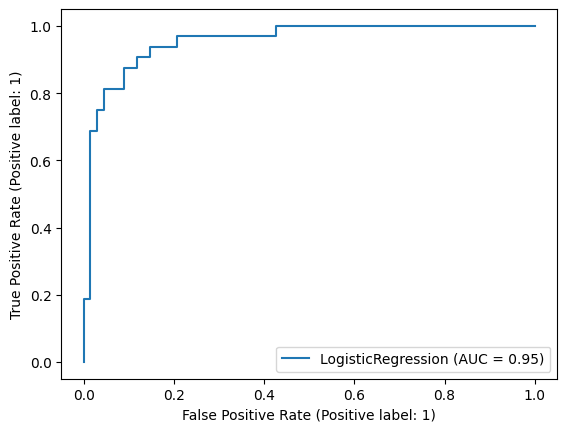

In [34]:
from sklearn.metrics import RocCurveDisplay,confusion_matrix
RocCurveDisplay.from_estimator(logistic_regression, x_test, y_test)

**Making the Confusion Matrix**

<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

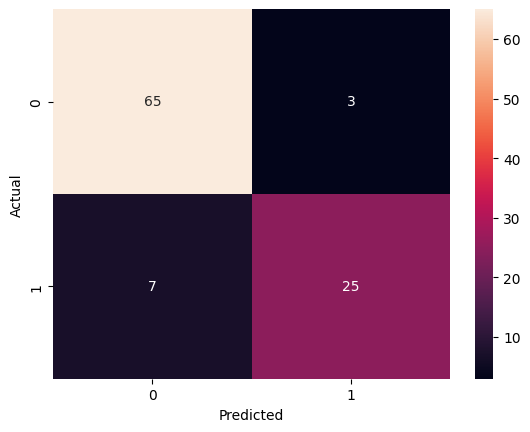

In [36]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

**Visualization**

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation

0.6425
Train Accuracy :  0.6425
Val Accuracy :  0.675


C:\Users\kisho\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


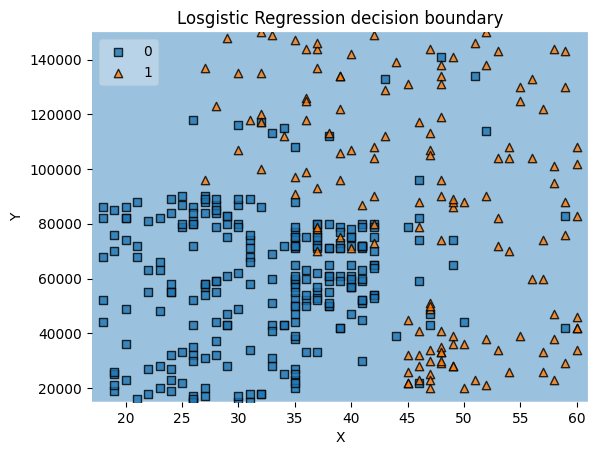

In [40]:
x = df[['Age','EstimatedSalary']].values
y = df['Purchased'].values
clf = LogisticRegression()
clf.fit(x, y)
print(clf.score(x,y))
print("Train Accuracy : ", clf.score(x,y)) # test the model and it computes the accuracy (train data accuracy)
print("Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))
plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Losgistic Regression decision boundary')
plt.show()

0.6425
Train Accuracy :  0.6425
Val Accuracy :  0.675


C:\Users\kisho\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


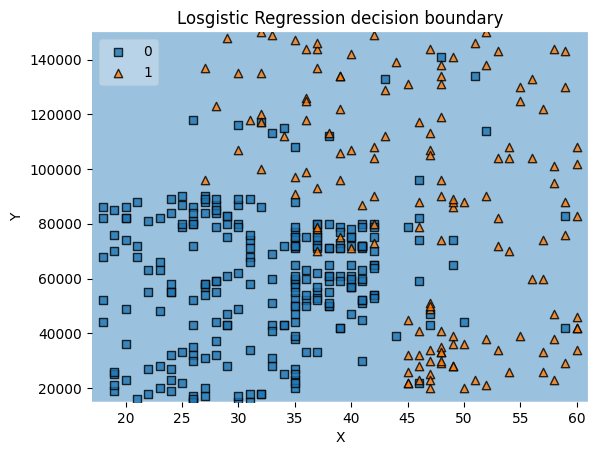

In [41]:
x = df[['Age','EstimatedSalary']].values
y = df['Purchased'].values
clf = LogisticRegression()
clf.fit(x, y)
print(clf.score(x,y))
print("Train Accuracy : ", clf.score(x,y)) # test the model and it computes the accuracy (train data accuracy)
print("Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))
plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Losgistic Regression decision boundary')
plt.show()

In [42]:
def logistic(data, k = 0):
  x = data[['Age','EstimatedSalary']].values
  y = data['Purchased'].values
  clf = LogisticRegression()
  clf.fit(x, y)
  print(clf.score(x,y))
  print("Train Accuracy : ", clf.score(x,y)) # test the model and it computes the accuracy (train data accuracy)
  print("Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Losgistic Regression decision boundary')
  plt.show()

0.6425
Train Accuracy :  0.6425
Val Accuracy :  0.675


C:\Users\kisho\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


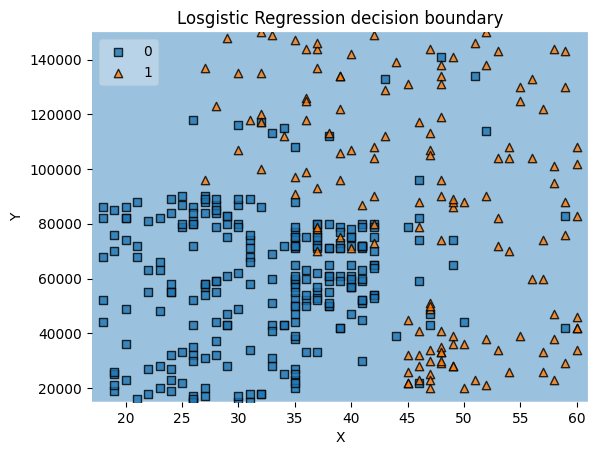

In [45]:
logistic(df,5)